**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
from Examproject import ProductionEconomy
model = ProductionEconomy

# Initialize parameters
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Initialize the economy with parameters
model = ProductionEconomy(A=par.A, gamma=par.gamma, alpha=par.alpha, nu=par.nu, epsilon=par.epsilon)

# Setting parameters
w = 1  # Wage (numeraire)

# Function to check market clearing
def check_market_clearing(model, p1_values, p2_values, w, tau, T):
    results = []
    for p1 in p1_values:
        for p2 in p2_values:
            ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
            c1, c2, income = model.consumer_budget(p1, p2, w, tau, T, ell_opt)
            y1 = model.firm1_output_opt(w, p1)
            y2 = model.firm2_output_opt(w, p2)
            labor_demand_total = model.firm1_labor_demand(w, p1) + model.firm2_labor_demand(w, p2)
            labor_market_clear = np.isclose(ell_opt, labor_demand_total)
            goods_market1_clear = np.isclose(model.C1_star(p1, p2, w, tau, T), model.firm1_output_opt(w, p1)) 
            goods_market2_clear = np.isclose(model.C2_star(p1, p2, w, tau, T), model.firm2_output_opt(w, p2))
            results.append((p1, p2, labor_market_clear, goods_market1_clear, goods_market2_clear))
    return results

# Define the ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions
results = check_market_clearing(model, p1_values, p2_values, w, par.tau, par.T)

# Print the results
for result in results:
    p1, p2, labor_market_clear, goods_market1_clear, goods_market2_clear = result
    print(f"p1: {p1:.2f}, p2: {p2:.2f} - Labor Market Clear: {labor_market_clear}, Good1 Market Clear: {goods_market1_clear}, Good2 Market Clear: {goods_market2_clear}")


 

p1: 0.10, p2: 0.10 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.31 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.52 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.73 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.94 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.16 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.37 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.58 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.79 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 2.00 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Cle

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [3]:
from scipy.optimize import fsolve

# Function to solve for equilibrium prices
def market_clearing_equilibrium(p, model, w, tau, T):
    p1, p2 = p
    ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
    
    # Calculate market quantities
    labor_demand_total = model.firm1_labor_demand(w, p1) + model.firm2_labor_demand(w, p2)
    y1 = model.firm1_output_opt(w, p1)
    c1 = model.C1_star(p1, p2, w, tau, T)
    
    # Equilibrium conditions (2 out of 3 due to Walras' Law)
    labor_market_clearing = ell_opt - labor_demand_total
    goods_market1_clearing = c1 - y1
    
    return [labor_market_clearing, goods_market1_clearing]

# Initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Solve for equilibrium prices
equilibrium_prices = fsolve(market_clearing_equilibrium, initial_guess, args=(model, w, par.tau, par.T))

# Extract equilibrium prices
p1_star, p2_star = equilibrium_prices

# Print the equilibrium prices  
print(f"Equilibrium prices: p1* = {p1_star:.4f}, p2* = {p2_star:.4f}")




Equilibrium prices: p1* = 0.9741, p2* = 1.4880


In [4]:
import numpy as np

# Function to check if the market clears at equilibrium prices
def test_market_clearing_at_equilibrium(model, p1_star, p2_star, w, tau, T):
    ell_opt = model.consumer_optimal_labor(p1_star, p2_star, w, tau, T)
    c1, c2, income = model.consumer_budget(p1_star, p2_star, w, tau, T, ell_opt)
    y1 = model.firm1_output_opt(w, p1_star)
    y2 = model.firm2_output_opt(w, p2_star)
    labor_demand_total = model.firm1_labor_demand(w, p1_star) + model.firm2_labor_demand(w, p2_star)
    labor_market_clear = np.isclose(ell_opt, labor_demand_total)
    goods_market1_clear = np.isclose(model.C1_star(p1_star, p2_star, w, tau, T), y1)
    goods_market2_clear = np.isclose(model.C2_star(p1_star, p2_star, w, tau, T), y2)
    
    return labor_market_clear, goods_market1_clear, goods_market2_clear

# Test the equilibrium prices found
labor_market_clear, goods_market1_clear, goods_market2_clear = test_market_clearing_at_equilibrium(model, p1_star, p2_star, w, par.tau, par.T)

# Print the results
print(f"Equilibrium prices: p1* = {p1_star:.4f}, p2* = {p2_star:.4f}")
print(f"Labor Market Clear: {labor_market_clear}")
print(f"Goods Market 1 Clear: {goods_market1_clear}")
print(f"Goods Market 2 Clear: {goods_market2_clear}")

# Additional details
if not labor_market_clear:
    print("Labor market does not clear. Difference:", ell_opt - labor_demand_total)
if not goods_market1_clear:
    print("Goods market 1 does not clear. Difference:", model.C1_star(p1_star, p2_star, w, par.tau, par.T) - y1)
if not goods_market2_clear:
    print("Goods market 2 does not clear. Difference:", model.C2_star(p1_star, p2_star, w, par.tau, par.T) - y2)


Equilibrium prices: p1* = 0.9741, p2* = 1.4880
Labor Market Clear: True
Goods Market 1 Clear: True
Goods Market 2 Clear: True


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:

# Instantiate the ProductionEconomy class
economy = ProductionEconomy()

# Define the range for τ, p1, and p2
tau_values = np.linspace(0.1, 2.0, 10)
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Initialize variables to store the results
optimal_tau = 0
optimal_p1 = 0
optimal_p2 = 0
max_swf = -np.inf

# Loops to find the optimal τ, p1, and p2
for p1 in p1_values:
    for p2 in p2_values:
        for tau in tau_values:
            swf = model.SWF_function(p1=p1, p2=p2, w=1, tau=tau, kappa=economy.kappa)
            
            # Check if this is the best SWF so far
            if swf > max_swf:
                max_swf = swf
                optimal_tau = tau
                optimal_p1 = p1
                optimal_p2 = p2

# Calculate T using the optimal τ, p1, and p2
optimal_T = economy.calculate_T(p1=optimal_p1, p2=optimal_p2, w=1, tau=optimal_tau)

# Display results
print("Optimal tau:", optimal_tau)
print("Optimal T:", optimal_T)
print("Max SWF:", max_swf)



Optimal tau: 0.1
Optimal T: 0.3521003503503503
Max SWF: 1.18735696827552


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
import numpy as np
from types import SimpleNamespace

# Initialize arrays to store expected and realized utilities
expected_utilities = np.zeros(par.J)
realized_utilities = np.zeros(par.J)

# Simulate and calculate expected utility and average realized utility for each career track
for j in range(par.J):
    # Generate random noise for K simulations
    epsilon = np.random.normal(0, par.sigma, par.K)
    # Calculate utilities for career track j
    utilities = par.v[j] + epsilon
    # Calculate expected utility (mean of simulated utilities)
    expected_utilities[j] = np.mean(utilities)
    # Calculate realized utility (mean of realized utilities)
    realized_utilities[j] = np.mean(utilities)

# Print the results
print("Expected Utilities for each career track:", expected_utilities)
print("Realized Utilities for each career track:", realized_utilities)


Expected Utilities for each career track: [0.97525571 1.99519017 3.01200362]
Realized Utilities for each career track: [0.97525571 1.99519017 3.01200362]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

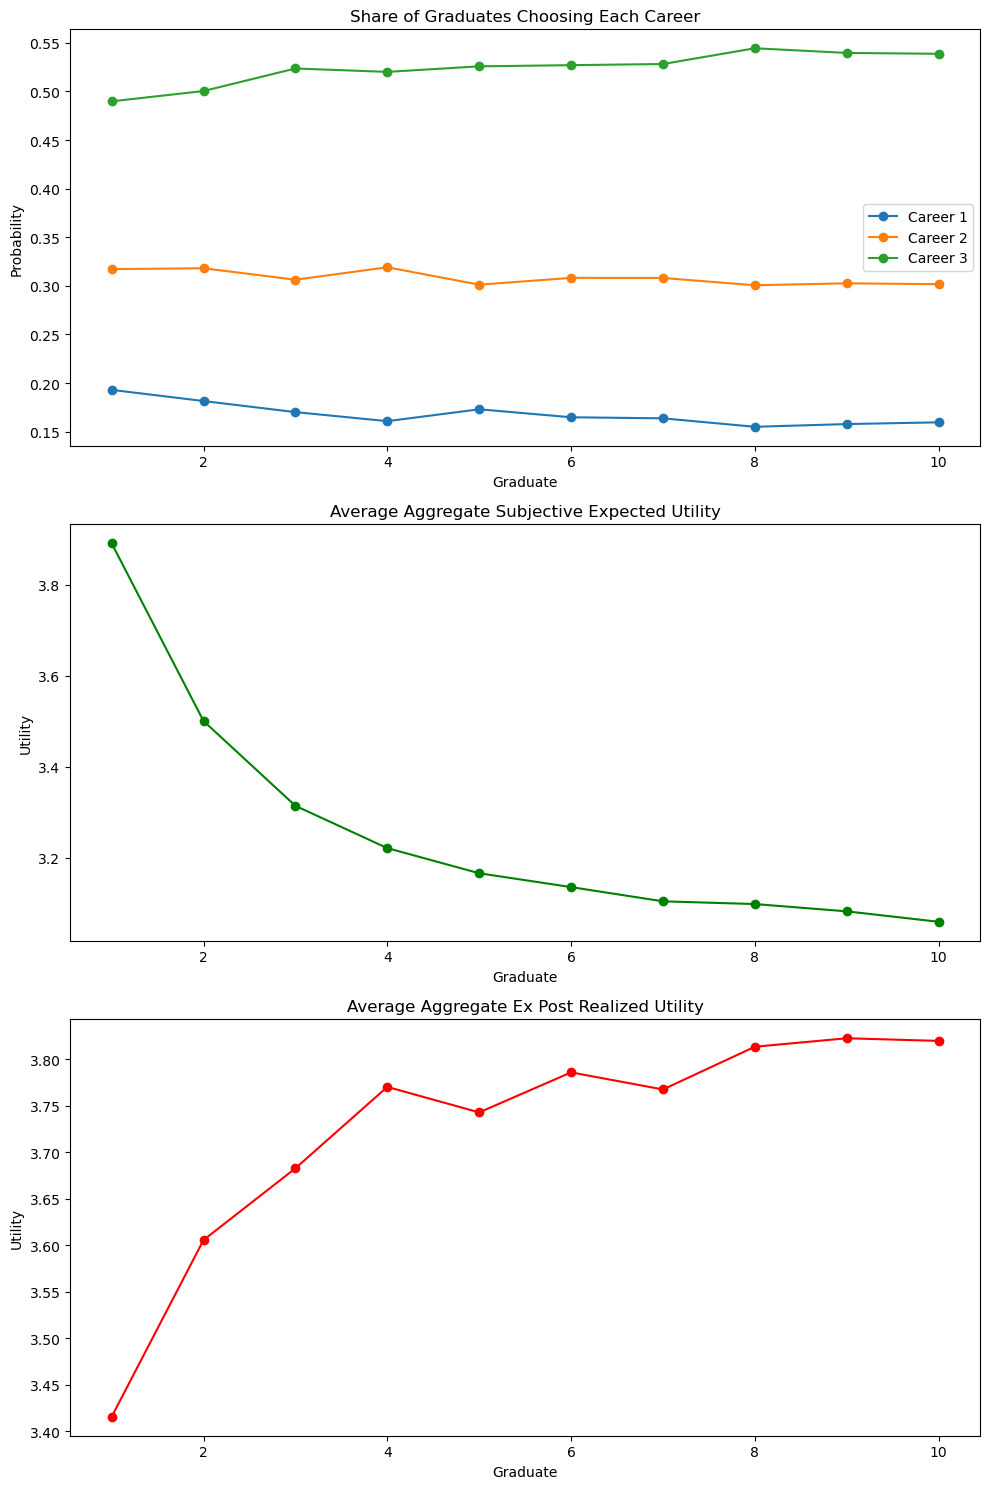

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Results storage
choice_probabilities = np.zeros((par.N, par.J))
avg_expected_utilities = np.zeros(par.N)
avg_realized_utilities = np.zeros(par.N)

# Simulation process
np.random.seed(0)  # For reproducibility
for i in range(1, par.N + 1):
    Fi = i  # Each graduate i has i friends in each career
    
    # Arrays to store utilities for each simulation
    all_expected_utilities = np.zeros(par.K)
    all_realized_utilities = np.zeros(par.K)
    choices = np.zeros((par.K, par.J))
    
    for k in range(par.K):
        # Draw friend and own noise for each career track
        friend_noise = np.random.normal(0, par.sigma, (Fi, par.J))
        own_noise = np.random.normal(0, par.sigma, par.J)
        
        # Calculate prior expected utility for each career
        prior_expected_utilities = par.v + np.mean(friend_noise, axis=0)
        
        # Calculate total utility including own noise
        total_utilities = prior_expected_utilities + own_noise
        
        # Determine the chosen career based on the max utility
        chosen_career = np.argmax(total_utilities)
        choices[k, chosen_career] = 1
        all_expected_utilities[k] = np.max(prior_expected_utilities)
        all_realized_utilities[k] = par.v[chosen_career] + own_noise[chosen_career]

    # Calculate and store results
    choice_probabilities[i - 1] = choices.mean(axis=0)
    avg_expected_utilities[i - 1] = all_expected_utilities.mean()
    avg_realized_utilities[i - 1] = all_realized_utilities.mean()

# Visualization of metrics
plt.figure(figsize=(10, 15))
graduates = np.arange(1, par.N + 1)

# Plotting choice probabilities for each career
plt.subplot(3, 1, 1)
for j in range(par.J):
    plt.plot(graduates, choice_probabilities[:, j], marker='o', linestyle='-', label=f'Career {j+1}')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate')
plt.ylabel('Probability')
plt.legend()

# Plotting aggregated expected utilities
plt.subplot(3, 1, 2)
plt.plot(graduates, avg_expected_utilities, marker='o', linestyle='-', color='green')
plt.title('Average Aggregate Subjective Expected Utility')
plt.xlabel('Graduate')
plt.ylabel('Utility')

# Plotting aggregated realized utilities
plt.subplot(3, 1, 3)
plt.plot(graduates, avg_realized_utilities, marker='o', linestyle='-', color='red')
plt.title('Average Aggregate Ex Post Realized Utility')
plt.xlabel('Graduate')
plt.ylabel('Utility')

plt.tight_layout()
plt.show()


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

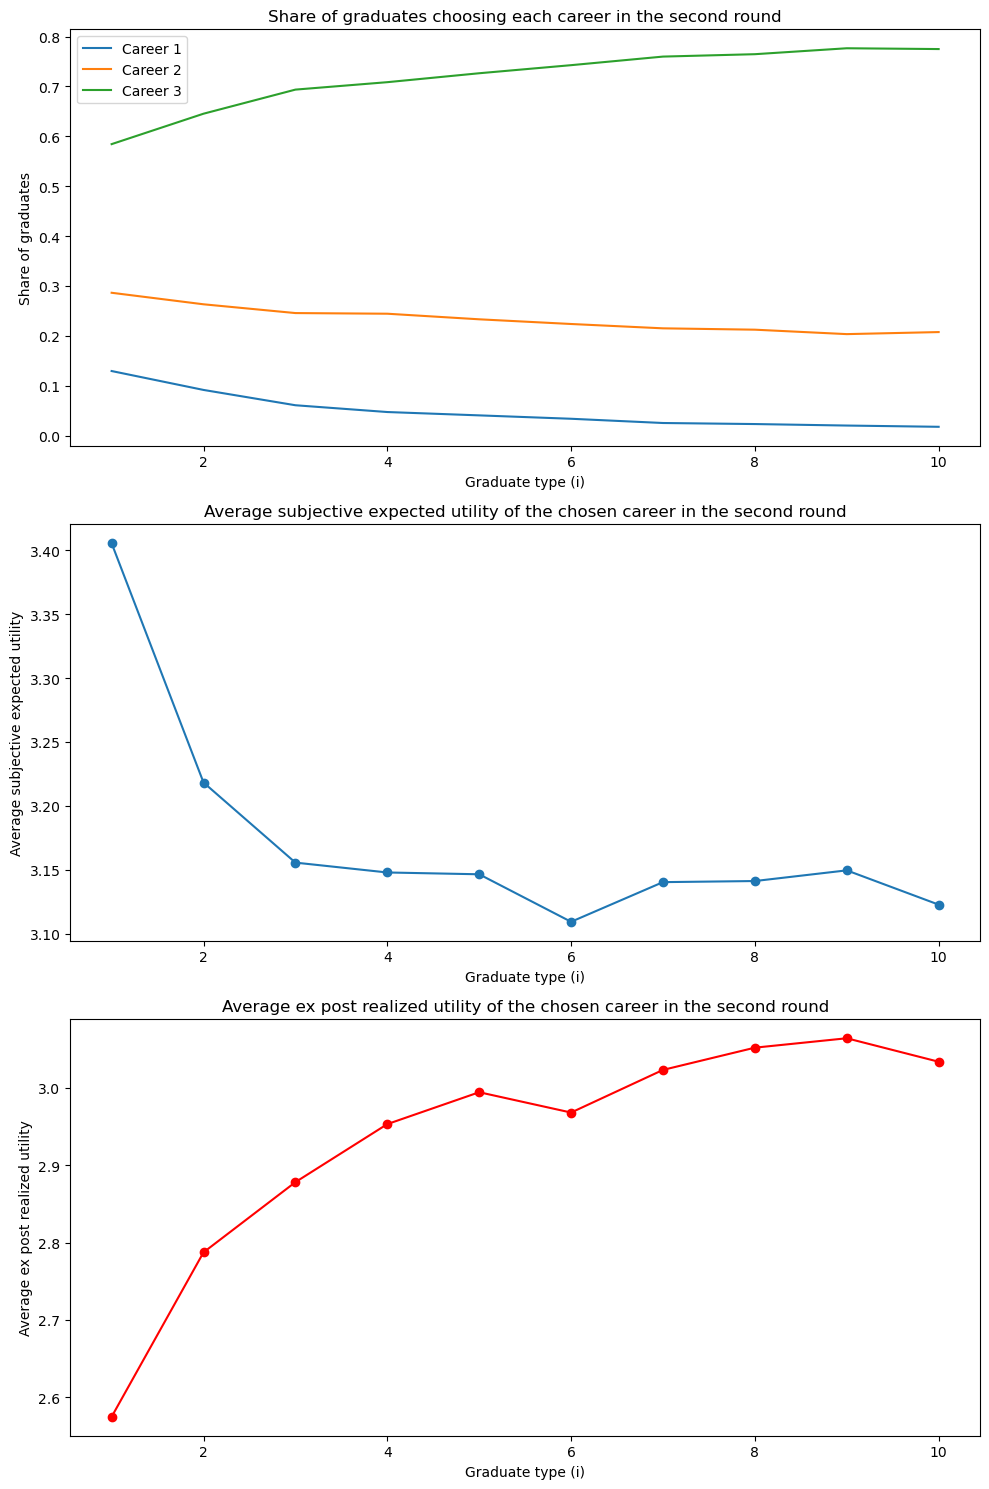

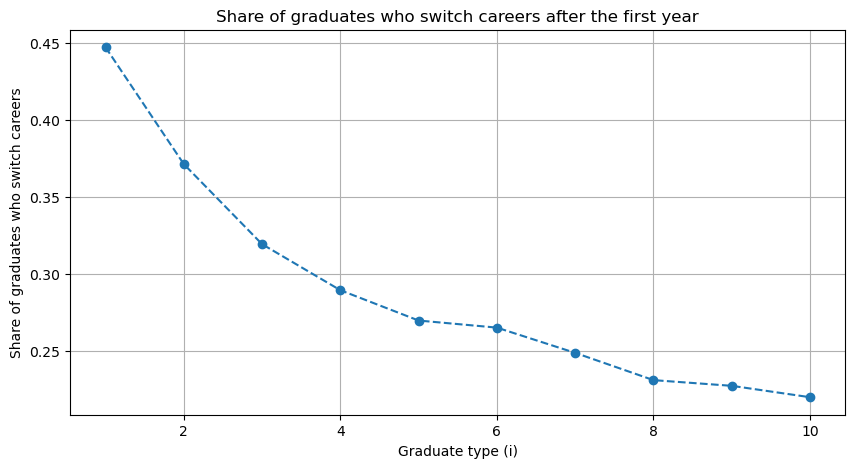

In [10]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
v = par.v
par.c = 1

# Initialize arrays to store results for the first round
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulation loop for the first round
for k in range(par.K):
    for i in range(1, par.N + 1):
        # Number of friends
        F_i = i

        # Draw epsilon values for friends
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, F_i))

        # Calculate prior expected utility for each career track
        prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1)

        # Draw epsilon values for the graduate
        epsilon_i = np.random.normal(0, par.sigma, par.J)

        # Choose the career track with the highest expected utility
        chosen_career = np.argmax(prior_expected_utility)
        chosen_careers[i-1, k] = chosen_career

        # Store prior expected utility of the chosen career
        prior_expected_utilities[i-1, k] = prior_expected_utility[chosen_career]

        # Calculate realized utility for the chosen career
        realized_utilities[i-1, k] = v[chosen_career] + epsilon_i[chosen_career]

# Initialize arrays to store results for the second round
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
new_prior_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switch_decision = np.zeros((par.N, par.K), dtype=bool)

# Simulation loop for the second round
for k in range(par.K):
    for i in range(1, par.N + 1):
        chosen_career = chosen_careers[i-1, k]
        initial_realized_utility = realized_utilities[i-1, k]

        # Draw epsilon values for friends again for the two remaining careers
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, i))

        # Calculate new prior expected utility for each career track
        new_prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1)
        new_prior_expected_utility -= par.c  # Apply switching cost

        # Update the utility for the chosen career with the known value
        new_prior_expected_utility[chosen_career] = initial_realized_utility

        # Draw new epsilon values for the graduate for the remaining careers
        epsilon_i = np.random.normal(0, par.sigma, par.J)

        # Calculate new realized utilities
        new_realized_utility = par.v + epsilon_i
        new_realized_utility -= par.c  # Apply switching cost
        new_realized_utility[chosen_career] = initial_realized_utility

        # Choose the career track with the highest updated utility
        new_chosen_career = np.argmax(new_prior_expected_utility)
        new_chosen_careers[i-1, k] = new_chosen_career

        # Store the new prior expected utility of the chosen career
        new_prior_expected_utilities[i-1, k] = new_prior_expected_utility[new_chosen_career]

        # Store the new realized utility of the chosen career
        new_realized_utilities[i-1, k] = new_realized_utility[new_chosen_career]

        # Determine if the graduate decided to switch careers
        switch_decision[i-1, k] = (new_chosen_career != chosen_career)

# Calculate the share of graduates choosing each career for each type of graduate in the second round
new_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        new_shares[i, j] = np.mean(new_chosen_careers[i] == j)

# Calculate the average subjective expected utility for each type of graduate in the second round
new_average_subjective_expected_utilities = np.mean(new_prior_expected_utilities, axis=1)

# Calculate the average ex post realized utility for each type of graduate in the second round
new_average_realized_utilities = np.mean(new_realized_utilities, axis=1)

# Calculate the share of graduates who switch careers for each type of graduate
switch_shares = np.mean(switch_decision, axis=1)

# Visualize the results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

x = np.arange(1, par.N + 1)

# Plot share of graduates choosing each career in the second round
for j in range(par.J):
    ax[0].plot(x, new_shares[:, j], label=f'Career {j + 1}')
ax[0].set_xlabel('Graduate type (i)')
ax[0].set_ylabel('Share of graduates')
ax[0].legend()
ax[0].set_title('Share of graduates choosing each career in the second round')

# Plot average subjective expected utility in the second round
ax[1].plot(x, new_average_subjective_expected_utilities, marker='o')
ax[1].set_xlabel('Graduate type (i)')
ax[1].set_ylabel('Average subjective expected utility')
ax[1].set_title('Average subjective expected utility of the chosen career in the second round')

# Plot average ex post realized utility in the second round
ax[2].plot(x, new_average_realized_utilities, marker='o', color='r')
ax[2].set_xlabel('Graduate type (i)')
ax[2].set_ylabel('Average ex post realized utility')
ax[2].set_title('Average ex post realized utility of the chosen career in the second round')

plt.tight_layout()
plt.show()

# Plot share of graduates who switch careers
plt.figure(figsize=(10, 5))
plt.plot(x, switch_shares, marker='o', linestyle='--')
plt.xlabel('Graduate type (i)')
plt.ylabel('Share of graduates who switch careers')
plt.title('Share of graduates who switch careers after the first year')
plt.grid(True)
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$. 

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

Coordinates of points forming Triangle ABC: [0.26071605 0.43635845] [0.21315735 0.274245  ] [0.10056103 0.27951775]
Coordinates of points forming Triangle CDA: [0.10056103 0.27951775] [0.20634391 0.44272557] [0.26071605 0.43635845]
Point y is inside Triangle ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Point y is not inside Triangle CDA.


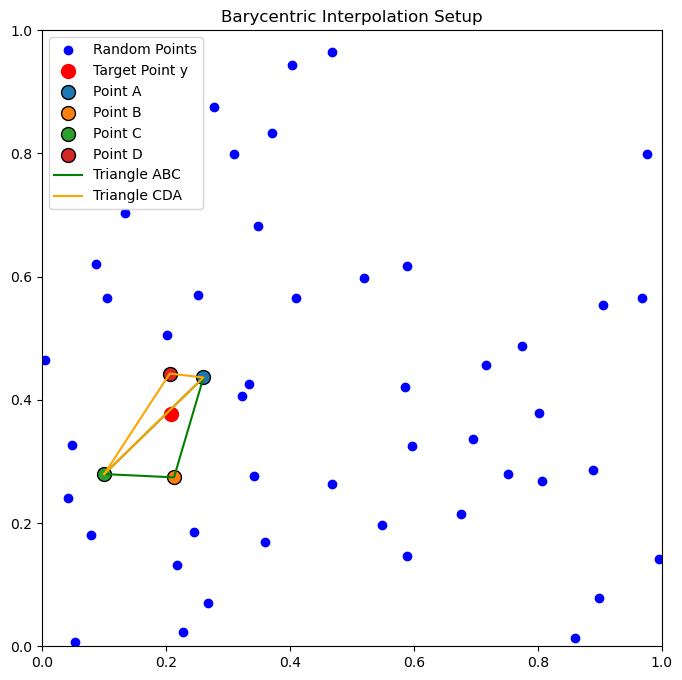

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Examproject import Problem  # Ensure this matches the actual filename

model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # 50 random points
y = rng.uniform(size=(2,))     # Target point

# Identify points A, B, C, and D based on specific conditions
points = {
    'A': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

# Calculate barycentric coordinates
coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y) if all(points.get(k) is not None for k in ['A', 'B', 'C']) else None
coords_cda = model.point_in_triangle(points['C'], points['D'], points['A'], y) if all(points.get(k) is not None for k in ['C', 'D', 'A']) else None

# Output point information
print("Coordinates of points forming Triangle ABC:", points['A'], points['B'], points['C'])
print("Coordinates of points forming Triangle CDA:", points['C'], points['D'], points['A'])

if coords_abc:
    print("Point y is inside Triangle ABC:", coords_abc)
else:
    print("Point y is not inside Triangle ABC.")

if coords_cda:
    print("Point y is inside Triangle CDA:", coords_cda)
else:
    print("Point y is not inside Triangle CDA.")

# Plotting setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
ax.scatter(y[0], y[1], color='red', label='Target Point y', s=100)
for key, pt in points.items():
    if pt is not None:
        ax.scatter(pt[0], pt[1], label=f'Point {key}', s=100, edgecolors='black')

# Draw triangles if all points are available
if all(points.get(key) is not None for key in ['A', 'B', 'C']):
    model.draw_triangle(ax, points, ['A', 'B', 'C'], 'green', 'Triangle ABC')
if all(points.get(key) is not None for key in ['C', 'D', 'A']):
    model.draw_triangle(ax, points, ['C', 'D', 'A'], 'orange', 'Triangle CDA')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Barycentric Interpolation Setup")
ax.legend()
plt.show()

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [13]:
# write yo# Instantiate the model
model = Problem()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # Generate random points
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])  # Calculate function values for X

y = rng.uniform(size=(2,))  # Target point

# Identify points A, B, C, and D based on specific conditions
indices = {
    'A': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

if all(idx is not None for idx in indices.values()):
    points = {key: X[idx] for key, idx in indices.items()}
    values = {key: F[idx] for key, idx in indices.items()}

    coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y)
    if coords_abc:
        f_approx = model.approximate_value(coords_abc, [values['A'], values['B'], values['C']])
        print(f"Approximated value at {y}: {f_approx} (Actual: {f(y)})")
    else:
        print("Point y is not inside the triangle ABC or coordinates couldn't be computed.")
else:
    print("Not all points (A, B, C, D) could be found.")


Approximated value at [0.20901926 0.37774759]: 0.08405201731052576 (Actual: 0.0789565216259594)


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [14]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [20]:

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # Generate random points
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])  # Calculate function values for X

# Define target points
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]

# Function to approximate the value for a single point
def approximate_point(model, X, F, y):
    indices = {
        'A': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
        'B': model.find_closest_point_index(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
        'C': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
        'D': model.find_closest_point_index(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
    }

    if all(idx is not None for idx in indices.values()):
        points = {key: X[idx] for key, idx in indices.items()}
        values = {key: F[idx] for key, idx in indices.items()}

        coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y)
        if coords_abc:
            return model.approximate_value(coords_abc, [values['A'], values['B'], values['C']])
        else:
            coords_cda = model.point_in_triangle(points['C'], points['D'], points['A'], y)
            if coords_cda:
                return model.approximate_value(coords_cda, [values['C'], values['D'], values['A']])
    return None

# Compute the approximations for all points in Y
approximations = [approximate_point(model, X, F, y) for y in Y]
true_values = [f(y) for y in Y]

# Display results
for i, y in enumerate(Y):
    print(f"Point {y}: Approximated value = {approximations[i]}, True value = {true_values[i]}")

Point (0.2, 0.2): Approximated value = 0.04032631372248057, True value = 0.04000000000000001
Point (0.8, 0.2): Approximated value = 0.15874233999349835, True value = 0.16000000000000003
Point (0.8, 0.8): Approximated value = None, True value = 0.6400000000000001
Point (0.8, 0.2): Approximated value = 0.15874233999349835, True value = 0.16000000000000003
Point (0.5, 0.5): Approximated value = 0.2512901561119622, True value = 0.25
